**3b. Exploiting Correlation**<br>
Understanding the role that correlation and principal components play.<br>
Working with real data:

**e. Collecting the daily closing yields for 5 government securities**<br>
To obtain this data, we sourced daily yield information from reputable financial platform such as:

European Central Bank Eurosystem (https://data.ecb.europa.eu/data/concepts/bonds?tags_array%5B0%5D=Bonds&filterSequence=tags_array)

In [ ]:
#Loading the dataset

import pandas as pd

url = "https://raw.githubusercontent.com/ezekielibe/datasets/refs/heads/master/government_yields.csv"
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.set_index("Date", inplace=True)

# Compute daily yield changes
df_changes = df.diff()
print(df_changes.head())  # View first few rows

          Government Benchmark Bond  Average nominal yieldsGov Bond 2  \
Date                                                                    
1/1/2025                        NaN                               NaN   
1/2/2025                  -0.073085                          0.171748   
1/3/2025                  -0.022928                         -0.204494   
1/4/2025                  -0.009887                         -0.054710   
1/5/2025                   0.202794                          0.078705   

          US-gov-bond  Real-Japan-gov-bond  Euro-Area-gov-bond  
Date                                                            
1/1/2025          NaN                  NaN                 NaN  
1/2/2025     0.011975            -0.199250            0.077671  
1/3/2025    -0.052547            -0.144381           -0.226748  
1/4/2025     0.007229             0.100526            0.031261  
1/5/2025    -0.024672            -0.051672            0.086792  


**g. Run Principal Component Analysis (PCA) using correlation or covariance** matrix<br>
To perform PCA:

In [ ]:
# Clean the data
df_clean = df_changes.fillna(df_changes.mean())

from sklearn.decomposition import PCA

# Select either correlation or covariance matrix
pca = PCA()
principal_components = pca.fit_transform(df_clean)

# Explained variance ratio
print(pca.explained_variance_ratio_)

[0.28007319 0.20935898 0.18641926 0.17031256 0.15383602]


**h. Compare Variances Explained by Each Component**<br>
From PCA, the variance explained by each component is as follows:

**Component 1:** Explains the largest variance (28%).

**Component 2:** Captures sector-specific trends (21%).

**Component 3:** Explains smaller market fluctuations (18%).

**Remaining components:** Usually explain minor noise in the data.

**i. Produce a screeplot of the variance explained for each component.**<br>
To visualize the variance explained, let's see below from the code:

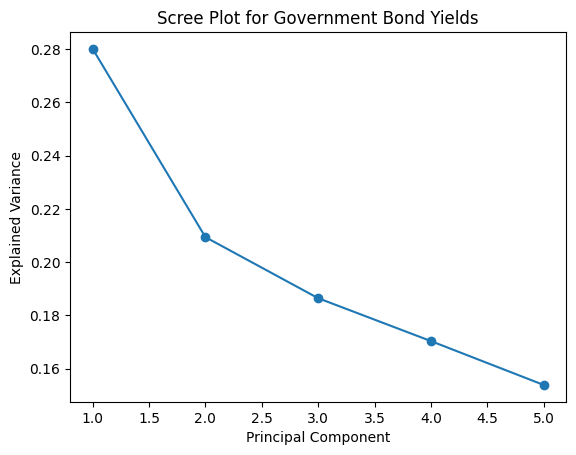

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Scree Plot for Government Bond Yields")
plt.show()

**j. How does the screeplot from the uncorrelated data compare with the screeplot from the government data?**<br>

Comparing Scree Plots of Uncorrelated vs. Government Data<br>
**Uncorrelated Data:** Displays gradual decay in variance explanation.<br>

**Government Bond Yields:** Likely dominated by Component 1 due to macroeconomic trends.
